In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
ACS_df = pd.read_csv("../data/processed/ACS_2011_2017_clean.csv")

In [3]:
CPS_df = pd.read_csv("../data/raw/cps_00050.zip")

In [4]:
CPS_additional = CPS_df[["STATEFIP", "YEAR", "SEX", "RACE", "MARST", "AGE", "WTFINL"]]

In [5]:
CPS_additional["white"] = (CPS_additional["RACE"] == 100).astype(int)
CPS_additional["black"] = (CPS_additional["RACE"] == 200).astype(int)
CPS_additional["asian"] = (CPS_additional["RACE"] == 650).astype(int) 
CPS_additional["female"] = (CPS_additional["SEX"] == 2).astype(int)

<ipython-input-5-4b7b722b7e25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPS_additional["white"] = (CPS_additional["RACE"] == 100).astype(int)
<ipython-input-5-4b7b722b7e25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPS_additional["black"] = (CPS_additional["RACE"] == 200).astype(int)
<ipython-input-5-4b7b722b7e25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [6]:
CPS_additional['single'] = CPS_additional['MARST'] == 3 & 4 & 5 & 6 & 7
CPS_additional['married'] = CPS_additional['MARST'] == 1 & 2

<ipython-input-6-0e51b338cd3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPS_additional['single'] = CPS_additional['MARST'] == 3 & 4 & 5 & 6 & 7
<ipython-input-6-0e51b338cd3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPS_additional['married'] = CPS_additional['MARST'] == 1 & 2


In [7]:
CPS_additional.drop('AGE', axis=1)

,STATEFIP,YEAR,SEX,RACE,MARST,WTFINL,white,black,asian,female,single,married
0,1,2009,2,200,5,2279.7665,0,1,0,1,False,False
1,1,2009,1,200,3,2070.5492,0,1,0,0,False,False
2,1,2009,2,100,1,2749.3462,1,0,0,1,False,False
3,1,2009,1,100,1,2486.9229,1,0,0,0,False,False
4,1,2009,1,100,1,2476.0645,1,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1578972,56,2017,2,100,6,227.9216,1,0,0,1,False,False
1578973,56,2017,1,100,9,313.0697,1,0,0,0,False,False
1578974,56,2017,2,100,9,227.8526,1,0,0,1,False,False
1578975,56,2017,1,100,9,260.1221,1,0,0,0,False,False


In [8]:
AGE_CPS_list = []

for age in CPS_additional.AGE:
    if age < 1:
        AGE_CPS_list.append("Too Young")
    elif age in range(1,19):
        AGE_CPS_list.append("1-18")
    elif age in range(19,25):
        AGE_CPS_list.append("19-24")
    elif age in range(25,55):
        AGE_CPS_list.append("25-54")
    elif age in range(55,65):
        AGE_CPS_list.append("55-64")
    else:
        AGE_CPS_list.append("65+")
        
CPS_additional["AGE_b"] = AGE_CPS_list

<ipython-input-8-f4eb30803238>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPS_additional["AGE_b"] = AGE_CPS_list


In [9]:
age_dummies = pd.get_dummies(CPS_additional["AGE_b"])

In [10]:
CPS_additional = CPS_additional.join(age_dummies)

In [11]:
CPS_additional.drop("AGE_b", axis =1, inplace=True)

In [12]:
CPS_additional.drop("AGE", axis =1, inplace=True)

In [13]:
CPS_additional.head()

,STATEFIP,YEAR,SEX,RACE,MARST,WTFINL,white,black,asian,female,single,married,1-18,19-24,25-54,55-64,65+,Too Young
0,1,2009,2,200,5,2279.7665,0,1,0,1,False,False,0,0,0,0,1,0
1,1,2009,1,200,3,2070.5492,0,1,0,0,False,False,0,0,0,0,1,0
2,1,2009,2,100,1,2749.3462,1,0,0,1,False,False,0,0,0,0,1,0
3,1,2009,1,100,1,2486.9229,1,0,0,0,False,False,0,0,0,0,1,0
4,1,2009,1,100,1,2476.0645,1,0,0,0,False,False,0,0,0,1,0,0


In [14]:
CPS_columns = list(CPS_additional[CPS_additional.columns[6:]].columns)

In [318]:
for column in CPS_columns:
    CPS_additional[column] = CPS_additional[column].astype(int)* CPS_additional.WTFINL

In [313]:
CPS_additional.groupby(["YEAR", "STATEFIP"]).sum()

SEX     RACE   MARST      WTFINL         white         black  \
YEAR STATEFIP                                                                   
2009 1          4530   406084   12057   9229756.0  6.110925e+13  2.190658e+13   
     2          5453   730539   15229   1329860.0  1.272415e+12  6.936018e+10   
     4          4866   455209   13934  13010215.0  1.477814e+14  7.022198e+12   
     5          4439   385519   12259   5645767.0  2.590208e+13  4.930680e+12   
     6         34509  4384916  100264  73068293.0  4.131490e+15  3.465062e+14   
...              ...      ...     ...         ...           ...           ...   
2017 51         7109   885924   18885  16493857.0  1.824320e+14  5.307967e+13   
     53         6934   830080   19277  14606187.0  1.711744e+14  8.640582e+12   
     54         8198   651233   21304   3591631.0  1.200805e+13  4.411493e+11   
     55         5511   501093   15084  11443818.0  1.141032e+14  8.354491e+12   
     56         5602   443726   15399   1147078.0  1.228471e+12  1.618756e+10   

               asian        female  single  married          1-18  \
YEAR STATEFIP                                                       
2009 1           0.0  4.419617e+13     0.0      0.0  2.037726e+13   
     2           0.0  8.705317e+11     0.0      0.0  4.711295e+11   
     4           0.0  8.508902e+13     0.0      0.0  4.421667e+13   
     5           0.0  1.635316e+13     0.0      0.0  8.027524e+12   
     6           0.0  2.687985e+15     0.0      0.0  1.367399e+15   
...              ...           ...     ...      ...           ...   
2017 51          0.0  1.401135e+14     0.0      0.0  6.262386e+13   
     53          0.0  1.075441e+14     0.0      0.0  4.803833e+13   
     54          0.0  6.548010e+12     0.0      0.0  2.809004e+12   
     55          0.0  6.609492e+13     0.0      0.0  3.027983e+13   
     56          0.0  6.490041e+11     0.0      0.0  3.203571e+11   

                      19-24         25-54         55-64           65+  \
YEAR STATEFIP                                                           
2009 1         6.980778e+12  3.387508e+13  1.008009e+13  1.249851e+13   
     2         1.684228e+11  7.476313e+11  2.080872e+11  1.433376e+11   
     4         1.294479e+13  7.063313e+13  1.981490e+13  1.916181e+13   
     5         2.903883e+12  1.206413e+13  3.648379e+12  4.726642e+12   
     6         4.790575e+14  2.258408e+15  5.746818e+14  5.763534e+14   
...                     ...           ...           ...           ...   
2017 51        2.070812e+13  1.069082e+14  3.798286e+13  4.025496e+13   
     53        1.682774e+13  8.529268e+13  2.839484e+13  3.253446e+13   
     54        9.128058e+11  4.708758e+12  1.856112e+12  2.498098e+12   
     55        9.263118e+12  5.059884e+13  1.844825e+13  2.075890e+13   
     56        9.814055e+10  4.828659e+11  1.838204e+11  2.096514e+11   

                  Too Young  
YEAR STATEFIP                
2009 1         1.376673e+12  
     2         2.992052e+10  
     4         2.494396e+12  
     5         5.041218e+11  
     6         8.307638e+13  
...                     ...  
2017 51        3.569337e+12  
     53        2.252654e+12  
     54        1.150363e+11  
     55        1.612033e+12  
     56        2.095367e+10  

[357 rows x 16 columns]

In [298]:
CPS_model = pd.read_csv("../data/interim/CPS_model_df.csv")

In [299]:
CPS_model_subset = CPS_model.loc[:,["YEAR", "MONTH", "REGION", "STATEFIP", "COUNTY", "AGE", "SEX", "RACE", "BUNBANKED", 
                             "BACCTEV", "BCHECKEV", "BCHECK12M", "BCHECKREAS", "BPAYDAY", "BPAYDAYOFT", 
                             "BPAYDAYREAS", "BCHECK30D", "BPAYDAY12M", "BPAYDAY30D", "BINCWHERE", "BBILLCASH", 
                             "BBILLCHECK", "BCREDITAPP", "BCREDITDENY", "BNOACCT", "BSAVECACCT", "BINC12M", "BINTERNET", 
                             "BPSUPINT", "CIHHCOMP", "CINETHH", "CINETHP", "CINTUSE", "CINTOUT", "CINTOTHH", "CINTLIBH", 
                             "CINTSCH", "CINTSCHH", "CINONET", "CIHSNET", "CIPWT", "CISUPPWT", "UBSUPPWT"]]

In [300]:
CPS_model_subset[CPS_model_subset.isnull() == False]

,YEAR,MONTH,REGION,STATEFIP,COUNTY,AGE,SEX,RACE,BUNBANKED,BACCTEV,...,CINTOUT,CINTOTHH,CINTLIBH,CINTSCH,CINTSCHH,CINONET,CIHSNET,CIPWT,CISUPPWT,UBSUPPWT
0,2009,1,32,1,1015,78,2,200,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2870.1104
1,2009,1,32,1,0,71,1,200,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2558.5056
2,2009,1,32,1,0,68,2,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3433.2190
3,2009,1,32,1,0,67,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3620.4713
4,2009,1,32,1,0,62,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3223.1477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450923,2017,11,41,56,0,31,2,100,NaN,NaN,...,2.0,2.0,NaN,1.0,NaN,NaN,NaN,428.8771,227.9216,NaN
1450924,2017,11,41,56,0,0,1,100,NaN,NaN,...,99.0,99.0,NaN,99.0,NaN,NaN,NaN,0.0000,313.0697,NaN
1450925,2017,11,41,56,0,7,2,100,NaN,NaN,...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,0.0000,227.8526,NaN
1450926,2017,11,41,56,0,10,1,100,NaN,NaN,...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,0.0000,260.1221,NaN


In [301]:
CPS_model_subset.isnull()

,YEAR,MONTH,REGION,STATEFIP,COUNTY,AGE,SEX,RACE,BUNBANKED,BACCTEV,...,CINTOUT,CINTOTHH,CINTLIBH,CINTSCH,CINTSCHH,CINONET,CIHSNET,CIPWT,CISUPPWT,UBSUPPWT
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450923,False,False,False,False,False,False,False,False,True,True,...,False,False,True,False,True,True,True,False,False,True
1450924,False,False,False,False,False,False,False,False,True,True,...,False,False,True,False,True,True,True,False,False,True
1450925,False,False,False,False,False,False,False,False,True,True,...,False,False,True,False,True,True,True,False,False,True
1450926,False,False,False,False,False,False,False,False,True,True,...,False,False,True,False,True,True,True,False,False,True


In [302]:
AGE_b_list = []

for age in ACS_df.AGE:
    if age < 1:
        AGE_b_list.append("Too Young")
    elif age in range(1,19):
        AGE_b_list.append("1-18")
    elif age in range(19,25):
        AGE_b_list.append("19-24")
    elif age in range(25,55):
        AGE_b_list.append("25-54")
    elif age in range(55,65):
        AGE_b_list.append("55-64")
    else:
        AGE_b_list.append("65+")
        
ACS_df["AGE_b"] = AGE_b_list

In [303]:
ACS_df.columns

Index(['Unnamed: 0', 'YEAR', 'SAMPLE', 'REGION', 'STATEFIP', 'COUNTYFIP',
       'HHINCOME', 'SEX', 'AGE', 'MARST', 'RACE', 'CITIZEN', 'EDUC', 'OCC2010',
       'CINETHH', 'CILAPTOP', 'CISMRTPHN', 'CITABLET', 'CIHAND', 'CIHISPEED',
       'CISAT', 'CIDIAL', 'CIOTHSVC', 'FAMSIZE', 'HHWT', 'AGE_b', 'single',
       'married', 'SMRTPHN_yes', 'SMRTPHN_no', 'INT_yes', 'INT_no',
       'LAPTOP_yes', 'LAPTOP_no', 'TABLET_yes', 'TABLET_no', 'HHELD_yes',
       'HHELD_no', 'white', 'black', 'asian', 'female'],
      dtype='object')

In [304]:
CPS_model_subset.columns

Index(['YEAR', 'MONTH', 'REGION', 'STATEFIP', 'COUNTY', 'AGE', 'SEX', 'RACE',
       'BUNBANKED', 'BACCTEV', 'BCHECKEV', 'BCHECK12M', 'BCHECKREAS',
       'BPAYDAY', 'BPAYDAYOFT', 'BPAYDAYREAS', 'BCHECK30D', 'BPAYDAY12M',
       'BPAYDAY30D', 'BINCWHERE', 'BBILLCASH', 'BBILLCHECK', 'BCREDITAPP',
       'BCREDITDENY', 'BNOACCT', 'BSAVECACCT', 'BINC12M', 'BINTERNET',
       'BPSUPINT', 'CIHHCOMP', 'CINETHH', 'CINETHP', 'CINTUSE', 'CINTOUT',
       'CINTOTHH', 'CINTLIBH', 'CINTSCH', 'CINTSCHH', 'CINONET', 'CIHSNET',
       'CIPWT', 'CISUPPWT', 'UBSUPPWT'],
      dtype='object')

In [305]:
ACS_df['single'] = ACS_df['MARST'] == 3 & 6
ACS_df['married'] = ACS_df['MARST'] == 1 & 2

ACS_df['SMRTPHN_yes'] = ACS_df['CISMRTPHN'] == 1
ACS_df['SMRTPHN_no'] = ACS_df['CISMRTPHN'] == 2

ACS_df['INT_yes'] = ACS_df['CINETHH'] == 1 & 2
ACS_df['INT_no'] = ACS_df['CINETHH'] == 3

ACS_df['LAPTOP_yes'] = ACS_df['CILAPTOP'] == 1
ACS_df['LAPTOP_no'] = ACS_df['CILAPTOP'] == 2

ACS_df['TABLET_yes'] = ACS_df['CITABLET'] == 1
ACS_df['TABLET_no'] = ACS_df['CITABLET'] == 2

ACS_df['HHELD_yes'] = ACS_df['CIHAND'] == 1
ACS_df['HHELD_no'] = ACS_df['CIHAND'] == 2

In [306]:
ACS_df.head()

,Unnamed: 0,YEAR,SAMPLE,REGION,STATEFIP,COUNTYFIP,HHINCOME,SEX,AGE,MARST,...,LAPTOP_yes,LAPTOP_no,TABLET_yes,TABLET_no,HHELD_yes,HHELD_no,white,black,asian,female
0,3061692,2011,201101,32,1,125,9999999,2,19,6,...,False,False,False,False,False,False,0,1,0,1
1,3061693,2011,201101,32,1,0,9999999,2,86,5,...,False,False,False,False,False,False,1,0,0,1
2,3061694,2011,201101,32,1,0,87200,1,78,1,...,False,False,False,False,False,False,1,0,0,0
3,3061695,2011,201101,32,1,0,87200,2,74,1,...,False,False,False,False,False,False,1,0,0,1
4,3061696,2011,201101,32,1,0,43200,1,57,6,...,False,False,False,False,False,False,1,0,0,0


In [307]:
CPS_model_subset.head()

,YEAR,MONTH,REGION,STATEFIP,COUNTY,AGE,SEX,RACE,BUNBANKED,BACCTEV,...,CINTOUT,CINTOTHH,CINTLIBH,CINTSCH,CINTSCHH,CINONET,CIHSNET,CIPWT,CISUPPWT,UBSUPPWT
0,2009,1,32,1,1015,78,2,200,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2870.1104
1,2009,1,32,1,0,71,1,200,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2558.5056
2,2009,1,32,1,0,68,2,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3433.2190
3,2009,1,32,1,0,67,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3620.4713
4,2009,1,32,1,0,62,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3223.1477


In [308]:
CPS_df["white"] = (CPS_df["RACE"] == 100).astype(int)
CPS_df["black"] = (CPS_df["RACE"] == 200).astype(int)
CPS_df["asian"] = (CPS_df["RACE"] == 650).astype(int) 
CPS_df["female"] = (CPS_df["SEX"] == 2).astype(int)

In [309]:
CPS_df["black"].describe()

count    1.578977e+06
mean     1.047533e-01
std      3.062353e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: black, dtype: float64

In [310]:
CPS_model_subset = CPS_model_subset[["YEAR", "STATEFIP", "BUNBANKED", "UBSUPPWT"]]

In [225]:
CPS_model_subset["UB_wtd"] = CPS_model_subset.BUNBANKED * CPS_model_subset.UBSUPPWT

In [311]:
CPS_model_subset

,YEAR,STATEFIP,BUNBANKED,UBSUPPWT
0,2009,1,1.0,2870.1104
1,2009,1,1.0,2558.5056
2,2009,1,1.0,3433.2190
3,2009,1,1.0,3620.4713
4,2009,1,1.0,3223.1477
...,...,...,...,...
1450923,2017,56,NaN,NaN
1450924,2017,56,NaN,NaN
1450925,2017,56,NaN,NaN
1450926,2017,56,NaN,NaN


In [226]:
CPS_model_subset = CPS_model_subset.groupby(["STATEFIP", "YEAR"]).sum()

In [227]:
state_char_df = pd.read_csv("../data/external/state_char.csv")

In [228]:
state_char_df.columns = ["STATE_NAME", "STATE", "STATEFIP", "YEAR", "POPULATION", "UNEMPLOYMENT", "UNEMPLOYMENTRATE", "POVERTYRATE"]

In [229]:
CPS_STATE_CHAR_merged = CPS_model_subset.merge(state_char_df, on=["STATEFIP", "YEAR"])

In [230]:
CPS_STATE_CHAR_merged["unbank_pc"] = (CPS_STATE_CHAR_merged.UB_wtd/CPS_STATE_CHAR_merged.POPULATION)

In [231]:
CPS_STATE_CHAR_merged["log_unbank_pc"] = np.log(CPS_STATE_CHAR_merged.unbank_pc)

In [232]:
CPS_STATE_CHAR_merged.unbank_pc

0      1.086124
1      0.857000
2      0.854378
3      0.888981
4      0.856124
         ...   
250    0.981977
251    0.795328
252    0.829051
253    0.797305
254    0.822262
Name: unbank_pc, Length: 255, dtype: float64

In [233]:
CPS_STATE_CHAR_merged.to_csv("../data/processed/CPS_STATE_CHAR_merged.csv")

In [234]:
ACS_subset_df = ACS_df[["YEAR", "STATEFIP", "HHWT", 'SMRTPHN_yes', 'INT_yes','LAPTOP_yes', 'TABLET_yes', 
        'HHELD_yes']]

In [235]:
ACS_subset_df.columns[3:]

Index(['SMRTPHN_yes', 'INT_yes', 'LAPTOP_yes', 'TABLET_yes', 'HHELD_yes'], dtype='object')

In [236]:
ACS_subset_df[ACS_subset_df.columns[3:]].astype(int).columns#["SMRTPHN_yes"]*ACS_subset_df.HHWT

Index(['SMRTPHN_yes', 'INT_yes', 'LAPTOP_yes', 'TABLET_yes', 'HHELD_yes'], dtype='object')

In [237]:
SMRTPHN_yes = ACS_subset_df[ACS_subset_df.columns[3:]].astype(int)["SMRTPHN_yes"]*ACS_subset_df.HHWT

In [238]:
INT_yes = ACS_subset_df[ACS_subset_df.columns[3:]].astype(int)["INT_yes"]*ACS_subset_df.HHWT

In [239]:
LAPTOP_yes = ACS_subset_df[ACS_subset_df.columns[3:]].astype(int)["LAPTOP_yes"]*ACS_subset_df.HHWT

In [240]:
TABLET_yes = ACS_subset_df[ACS_subset_df.columns[3:]].astype(int)["TABLET_yes"]*ACS_subset_df.HHWT

In [241]:
HHELD_yes = ACS_subset_df[ACS_subset_df.columns[3:]].astype(int)["HHELD_yes"]*ACS_subset_df.HHWT

In [242]:
ACS_subset_df.columns

Index(['YEAR', 'STATEFIP', 'HHWT', 'SMRTPHN_yes', 'INT_yes', 'LAPTOP_yes',
       'TABLET_yes', 'HHELD_yes'],
      dtype='object')

In [243]:
ACS_subset_df.SMRTPHN_yes = SMRTPHN_yes
ACS_subset_df.INT_yes = INT_yes
ACS_subset_df.LAPTOP_yes = LAPTOP_yes
ACS_subset_df.TABLET_yes = TABLET_yes
ACS_subset_df.HHELD_yes = HHELD_yes

C:\Users\Desmond\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [244]:
ACS_subset_df = ACS_subset_df.groupby(["STATEFIP", "YEAR"]).sum()

In [245]:
CPS_STATE_CHAR_merged

,STATEFIP,YEAR,BUNBANKED,UBSUPPWT,UB_wtd,STATE_NAME,STATE,POPULATION,UNEMPLOYMENT,UNEMPLOYMENTRATE,POVERTYRATE,unbank_pc,log_unbank_pc
0,1,2009,5884.0,4.601319e+06,5.167711e+06,AL,1,4757938,238252,11.0,16.6,1.086124,0.082615
1,1,2011,7615.0,3.744159e+06,4.114550e+06,AL,1,4801108,212257,9.6,15.4,0.857000,-0.154317
2,1,2013,10281.0,3.835587e+06,4.127101e+06,AL,1,4830533,156957,7.2,16.7,0.854378,-0.157381
3,1,2015,13879.0,3.884674e+06,4.319540e+06,AL,1,4858979,131395,6.1,16.3,0.888981,-0.117679
4,1,2017,10840.0,3.889184e+06,4.173389e+06,AL,1,4874747,96567,4.4,15.0,0.856124,-0.155340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,56,2009,2525.0,5.285080e+05,5.497609e+05,WY,51,559851,18970,6.3,9.2,0.981977,-0.018187
251,56,2011,8819.0,4.302979e+05,4.515616e+05,WY,51,567768,17796,5.8,10.7,0.795328,-0.229001
252,56,2013,9216.0,4.584171e+05,4.834456e+05,WY,51,583131,14477,4.7,11.8,0.829051,-0.187473
253,56,2015,11372.0,4.581589e+05,4.673063e+05,WY,51,586107,13108,4.3,9.8,0.797305,-0.226517


In [246]:
Banking_Aggregate = ACS_subset_df.merge(CPS_STATE_CHAR_merged, on=["STATEFIP", "YEAR"])

In [247]:
Banking_Aggregate

,STATEFIP,YEAR,HHWT,SMRTPHN_yes,INT_yes,LAPTOP_yes,TABLET_yes,HHELD_yes,BUNBANKED,UBSUPPWT,UB_wtd,STATE_NAME,STATE,POPULATION,UNEMPLOYMENT,UNEMPLOYMENTRATE,POVERTYRATE,unbank_pc,log_unbank_pc
0,1,2011,4566417.0,0.0,0.0,0.0,0.0,0.0,7615.0,3.744159e+06,4.114550e+06,AL,1,4801108,212257,9.6,15.4,0.857000,-0.154317
1,1,2013,4472485.0,0.0,115032.0,3288050.0,0.0,2833521.0,10281.0,3.835587e+06,4.127101e+06,AL,1,4830533,156957,7.2,16.7,0.854378,-0.157381
2,1,2015,4465809.0,0.0,119599.0,3236934.0,0.0,3285662.0,13879.0,3.884674e+06,4.319540e+06,AL,1,4858979,131395,6.1,16.3,0.888981,-0.117679
3,1,2017,4429306.0,3584019.0,118973.0,3141734.0,2658802.0,0.0,10840.0,3.889184e+06,4.173389e+06,AL,1,4874747,96567,4.4,15.0,0.856124,-0.155340
4,2,2011,694569.0,0.0,0.0,0.0,0.0,0.0,11382.0,5.326025e+05,5.563755e+05,AK,2,722720,27752,7.6,11.7,0.769836,-0.261578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,55,2017,5677060.0,4677470.0,145899.0,4569412.0,3851145.0,0.0,4040.0,4.679897e+06,4.791402e+06,WI,50,5795483,102957,3.3,9.5,0.826748,-0.190256
200,56,2011,540476.0,0.0,0.0,0.0,0.0,0.0,8819.0,4.302979e+05,4.515616e+05,WY,51,567768,17796,5.8,10.7,0.795328,-0.229001
201,56,2013,550283.0,0.0,14017.0,469862.0,0.0,383298.0,9216.0,4.584171e+05,4.834456e+05,WY,51,583131,14477,4.7,11.8,0.829051,-0.187473
202,56,2015,559146.0,0.0,14143.0,465813.0,0.0,453247.0,11372.0,4.581589e+05,4.673063e+05,WY,51,586107,13108,4.3,9.8,0.797305,-0.226517


In [248]:
CPS_additional = CPS_additional.groupby(["YEAR", "STATEFIP"]).sum()
CPS_additional

SEX     RACE   MARST      WTFINL       white      black  \
YEAR STATEFIP                                                              
2009 1          4530   406084   12057   9229756.0   6620895.0  2373473.0   
     2          5453   730539   15229   1329860.0    956804.0    52156.0   
     4          4866   455209   13934  13010215.0  11358871.0   539745.0   
     5          4439   385519   12259   5645767.0   4587877.0   873341.0   
     6         34509  4384916  100264  73068293.0  56542858.0  4742224.0   
...              ...      ...     ...         ...         ...        ...   
2017 51         7109   885924   18885  16493857.0  11060605.0  3218148.0   
     53         6934   830080   19277  14606187.0  11719310.0   591570.0   
     54         8198   651233   21304   3591631.0   3343341.0   122827.0   
     55         5511   501093   15084  11443818.0   9970725.0   730044.0   
     56         5602   443726   15399   1147078.0   1070957.0    14112.0   

               asian      female  single  married        1-18      19-24  \
YEAR STATEFIP                                                              
2009 1           0.0   4788444.0     0.0      0.0   2207779.0   756334.0   
     2           0.0    654604.0     0.0      0.0    354270.0   126647.0   
     4           0.0   6540170.0     0.0      0.0   3398612.0   994971.0   
     5           0.0   2896534.0     0.0      0.0   1421866.0   514347.0   
     6           0.0  36787298.0     0.0      0.0  18713979.0  6556298.0   
...              ...         ...     ...      ...         ...        ...   
2017 51          0.0   8494891.0     0.0      0.0   3796799.0  1255505.0   
     53          0.0   7362916.0     0.0      0.0   3288903.0  1152097.0   
     54          0.0   1823130.0     0.0      0.0    782097.0   254148.0   
     55          0.0   5775600.0     0.0      0.0   2645955.0   809443.0   
     56          0.0    565789.0     0.0      0.0    279281.0    85557.0   

                    25-54      55-64        65+  Too Young  
YEAR STATEFIP                                               
2009 1          3670203.0  1092130.0  1354154.0   149156.0  
     2           562188.0   156473.0   107784.0    22499.0  
     4          5429052.0  1523026.0  1472828.0   191726.0  
     5          2136846.0   646215.0   837201.0    89292.0  
     6         30908179.0  7864995.0  7887873.0  1136969.0  
...                   ...        ...        ...        ...  
2017 51         6481698.0  2302849.0  2440603.0   216404.0  
     53         5839490.0  1944028.0  2227444.0   154226.0  
     54         1311036.0   516788.0   695533.0    32029.0  
     55         4421500.0  1612071.0  1813984.0   140865.0  
     56          420953.0   160251.0   182770.0    18267.0  

[357 rows x 16 columns]

In [249]:
Banking_Aggregate = Banking_Aggregate.merge(CPS_additional, on=["STATEFIP", "YEAR"])

In [250]:
Banking_Aggregate = Banking_Aggregate.merge(CPS_STATE_CHAR_merged, on=["STATEFIP", "YEAR"])

In [251]:
Banking_Aggregate.head()

,STATEFIP,YEAR,HHWT,SMRTPHN_yes,INT_yes,LAPTOP_yes,TABLET_yes,HHELD_yes,BUNBANKED_x,UBSUPPWT_x,...,UBSUPPWT_y,UB_wtd_y,STATE_NAME_y,STATE_y,POPULATION_y,UNEMPLOYMENT_y,UNEMPLOYMENTRATE_y,POVERTYRATE_y,unbank_pc_y,log_unbank_pc_y
0,1,2011,4566417.0,0.0,0.0,0.0,0.0,0.0,7615.0,3.744159e+06,...,3.744159e+06,4.114550e+06,AL,1,4801108,212257,9.6,15.4,0.857000,-0.154317
1,1,2013,4472485.0,0.0,115032.0,3288050.0,0.0,2833521.0,10281.0,3.835587e+06,...,3.835587e+06,4.127101e+06,AL,1,4830533,156957,7.2,16.7,0.854378,-0.157381
2,1,2015,4465809.0,0.0,119599.0,3236934.0,0.0,3285662.0,13879.0,3.884674e+06,...,3.884674e+06,4.319540e+06,AL,1,4858979,131395,6.1,16.3,0.888981,-0.117679
3,1,2017,4429306.0,3584019.0,118973.0,3141734.0,2658802.0,0.0,10840.0,3.889184e+06,...,3.889184e+06,4.173389e+06,AL,1,4874747,96567,4.4,15.0,0.856124,-0.155340
4,2,2011,694569.0,0.0,0.0,0.0,0.0,0.0,11382.0,5.326025e+05,...,5.326025e+05,5.563755e+05,AK,2,722720,27752,7.6,11.7,0.769836,-0.261578


In [252]:
Banking_Aggregate.to_csv("../data/processed/Banking_Aggregate.csv")

## Logistic Regression

In [253]:
Banking_Aggregate = pd.read_csv("../data/processed/Banking_Aggregate.csv")

In [254]:
Banking_Aggregate.columns

Index(['Unnamed: 0', 'STATEFIP', 'YEAR', 'HHWT', 'SMRTPHN_yes', 'INT_yes',
       'LAPTOP_yes', 'TABLET_yes', 'HHELD_yes', 'BUNBANKED_x', 'UBSUPPWT_x',
       'UB_wtd_x', 'STATE_NAME_x', 'STATE_x', 'POPULATION_x', 'UNEMPLOYMENT_x',
       'UNEMPLOYMENTRATE_x', 'POVERTYRATE_x', 'unbank_pc_x', 'log_unbank_pc_x',
       'SEX', 'RACE', 'MARST', 'WTFINL', 'white', 'black', 'asian', 'female',
       'single', 'married', '1-18', '19-24', '25-54', '55-64', '65+',
       'Too Young', 'BUNBANKED_y', 'UBSUPPWT_y', 'UB_wtd_y', 'STATE_NAME_y',
       'STATE_y', 'POPULATION_y', 'UNEMPLOYMENT_y', 'UNEMPLOYMENTRATE_y',
       'POVERTYRATE_y', 'unbank_pc_y', 'log_unbank_pc_y'],
      dtype='object')

In [255]:
Banking_Aggregate.drop(["HHWT", "SEX", "RACE", "MARST", "WTFINL", "STATE"], axis=1, inplace=True)

KeyError: "['STATE'] not found in axis"

In [256]:
Banking_Aggregate = Banking_Aggregate[["STATEFIP", "STATE_NAME", "YEAR", "POPULATION", "SMRTPHN_yes", "INT_yes", "LAPTOP_yes", 
                                       "TABLET_yes", "HHELD_yes", "BUNBANKED_x", "UBSUPPWT_x", "UB_wtd_x", "white", "black", 
                                       "asian", "female", "single", "married", "1-18", "19-24", "25-54", "55-64", "65+", 
                                       "Too Young", "BUNBANKED_y", "UBSUPPWT_y", "UB_wtd_y", "UNEMPLOYMENT", "UNEMPLOYMENTRATE", 
                                       "POVERTYRATE", "unbank_pc", "log_unbank_pc"]]

KeyError: "['POVERTYRATE', 'UNEMPLOYMENTRATE', 'unbank_pc', 'UNEMPLOYMENT', 'POPULATION', 'STATE_NAME', 'log_unbank_pc'] not in index"

In [257]:
Banking_Aggregate.columns

Index(['Unnamed: 0', 'STATEFIP', 'YEAR', 'HHWT', 'SMRTPHN_yes', 'INT_yes',
       'LAPTOP_yes', 'TABLET_yes', 'HHELD_yes', 'BUNBANKED_x', 'UBSUPPWT_x',
       'UB_wtd_x', 'STATE_NAME_x', 'STATE_x', 'POPULATION_x', 'UNEMPLOYMENT_x',
       'UNEMPLOYMENTRATE_x', 'POVERTYRATE_x', 'unbank_pc_x', 'log_unbank_pc_x',
       'SEX', 'RACE', 'MARST', 'WTFINL', 'white', 'black', 'asian', 'female',
       'single', 'married', '1-18', '19-24', '25-54', '55-64', '65+',
       'Too Young', 'BUNBANKED_y', 'UBSUPPWT_y', 'UB_wtd_y', 'STATE_NAME_y',
       'STATE_y', 'POPULATION_y', 'UNEMPLOYMENT_y', 'UNEMPLOYMENTRATE_y',
       'POVERTYRATE_y', 'unbank_pc_y', 'log_unbank_pc_y'],
      dtype='object')

In [258]:
to_be_proportioned = ["SMRTPHN_yes", "INT_yes", "LAPTOP_yes", "TABLET_yes", "HHELD_yes", "white", "black", "asian", 
                      "female", "single", "married", "1-18", "19-24", "25-54", "55-64", "65+", "Too Young"]

In [263]:
for variable in to_be_proportioned:
    Banking_Aggregate[variable] = Banking_Aggregate[variable]/Banking_Aggregate["POPULATION_x"]

In [260]:
Banking_Aggregate[["SMRTPHN_yes", "INT_yes", "LAPTOP_yes", "TABLET_yes", "HHELD_yes", "white", "black", "asian", 
                      "female", "single", "married", "1-18", "19-24", "25-54", "55-64", "65+", "Too Young"]]

,SMRTPHN_yes,INT_yes,LAPTOP_yes,TABLET_yes,HHELD_yes,white,black,asian,female,single,married,1-18,19-24,25-54,55-64,65+,Too Young
0,0.0,0.0,0.0,0.0,0.0,6677784.0,2427784.0,0.0,4840129.0,0.0,0.0,2168367.0,743421.0,3763041.0,1216731.0,1290879.0,154486.0
1,0.0,115032.0,3288050.0,0.0,2833521.0,6793711.0,2502088.0,0.0,4939166.0,0.0,0.0,2228212.0,796184.0,3739138.0,1292416.0,1382098.0,85903.0
2,0.0,119599.0,3236934.0,0.0,3285662.0,6674430.0,2522316.0,0.0,4968282.0,0.0,0.0,2249305.0,729693.0,3610428.0,1389624.0,1430627.0,153885.0
3,3584019.0,118973.0,3141734.0,2658802.0,0.0,6630486.0,2553275.0,0.0,4985846.0,0.0,0.0,2186531.0,740731.0,3669967.0,1348573.0,1530067.0,120514.0
4,0.0,0.0,0.0,0.0,0.0,1019344.0,56252.0,0.0,678203.0,0.0,0.0,378731.0,120088.0,574228.0,179476.0,113257.0,18036.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,4677470.0,145899.0,4569412.0,3851145.0,0.0,9970725.0,730044.0,0.0,5775600.0,0.0,0.0,2645955.0,809443.0,4421500.0,1612071.0,1813984.0,140865.0
200,0.0,0.0,0.0,0.0,0.0,1028993.0,14261.0,0.0,534358.0,0.0,0.0,255236.0,88274.0,426648.0,145303.0,147141.0,18411.0
201,0.0,14017.0,469862.0,0.0,383298.0,1067928.0,19242.0,0.0,566169.0,0.0,0.0,275376.0,82406.0,463561.0,159938.0,151122.0,16343.0
202,0.0,14143.0,465813.0,0.0,453247.0,1089929.0,16054.0,0.0,566490.0,0.0,0.0,266005.0,94092.0,447203.0,155852.0,164960.0,20998.0


In [270]:
Banking_Aggregate = Banking_Aggregate[Banking_Aggregate.unbank_pc_x < 1]

In [183]:
#Banking_Aggregate = Banking_Aggregate[Banking_Aggregate.unbank_pc < 1.0]

In [274]:
def plot_function(df, target):
    plt.scatter(Banking_Aggregate['unbank_pc_x'], Banking_Aggregate[target], color='green')
    plt.title(f'{target} Vs Unbanked per capita', fontsize=14)
    plt.xlabel('Unbanked per capita', fontsize=14)
    plt.ylabel('Share of technology', fontsize=14)
    plt.grid(True)
    plt.show()

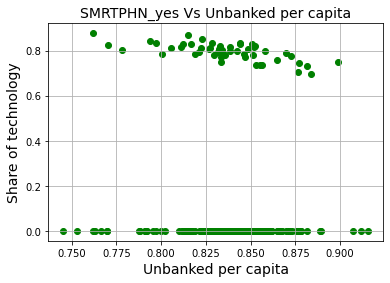

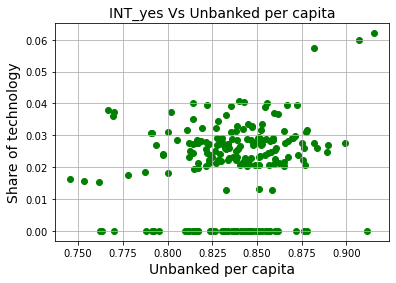

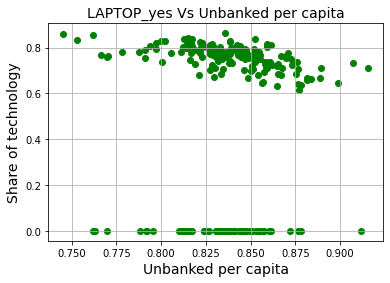

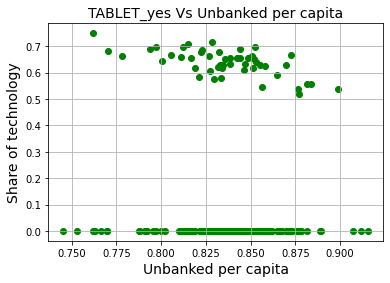

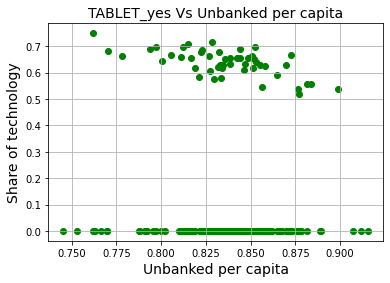

In [275]:
plot_function(Banking_Aggregate, 'SMRTPHN_yes')
plot_function(Banking_Aggregate, 'INT_yes')
plot_function(Banking_Aggregate, 'LAPTOP_yes')
plot_function(Banking_Aggregate, 'TABLET_yes')
plot_function(Banking_Aggregate, 'TABLET_yes')

In [276]:
Banking_Aggregate[["white", "black", "asian", 
                      "female", "single", "married", "1-18", "19-24", "25-54", "55-64", "65+", "Too Young"]].describe()

,white,black,asian,female,single,married,1-18,19-24,25-54,55-64,65+,Too Young
count,204.000000,204.000000,204.0,204.000000,204.0,204.0,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,1.557257,0.224338,0.0,0.999716,0.0,0.0,0.462097,0.159399,0.773928,0.255036,0.287157,0.024815
std,0.271492,0.211929,0.0,0.019355,0.0,0.0,0.040667,0.016620,0.043240,0.027503,0.041285,0.005673
min,0.369360,0.011019,0.0,0.921781,0.0,0.0,0.336383,0.121104,0.651953,0.164226,0.156709,0.010181
25%,1.427042,0.066750,0.0,0.990329,0.0,0.0,0.440532,0.147724,0.750494,0.238854,0.259120,0.021078
50%,1.615579,0.151313,0.0,1.002664,0.0,0.0,0.461415,0.158752,0.775137,0.254696,0.286684,0.024025
75%,1.735137,0.315982,0.0,1.012184,0.0,0.0,0.482448,0.169720,0.796709,0.269598,0.313771,0.028122
max,1.900173,1.029557,0.0,1.041935,0.0,0.0,0.624755,0.210196,0.979763,0.354631,0.399547,0.046882


In [187]:
Banking_Aggregate['unbank_pc'].value_counts()

1.0    204
Name: unbank_pc, dtype: int64

In [320]:
Banking_Aggregate.describe()

,Unnamed: 0,STATEFIP,YEAR,HHWT,SMRTPHN_yes,INT_yes,LAPTOP_yes,TABLET_yes,HHELD_yes,BUNBANKED_x,...,BUNBANKED_y,UBSUPPWT_y,UB_wtd_y,STATE_y,POPULATION_y,UNEMPLOYMENT_y,UNEMPLOYMENTRATE_y,POVERTYRATE_y,unbank_pc_y,log_unbank_pc_y
count,204.000000,204.000000,204.000000,2.040000e+02,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,2.040000e+02,2.040000e+02,204.000000,2.040000e+02,2.040000e+02,204.000000,204.000000,204.000000,204.000000
mean,101.500000,28.960784,2014.000000,5.903249e+06,0.198716,0.020679,0.569320,0.159316,0.346965,12469.588235,...,12469.588235,4.936815e+06,5.265655e+06,26.000000,6.251393e+06,1.988980e+05,6.041176,13.346569,0.836915,-0.178630
std,59.033889,15.715401,2.241569,6.592070e+06,0.345562,0.013592,0.332619,0.277733,0.350557,9921.780669,...,9921.780669,5.556790e+06,5.983655e+06,14.755812,7.069025e+06,2.638398e+05,2.091708,3.280340,0.028828,0.034777
min,0.000000,1.000000,2011.000000,5.404760e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1855.000000,...,1855.000000,4.302979e+05,4.515616e+05,1.000000,5.677680e+05,1.028000e+04,2.400000,6.600000,0.745340,-0.293915
25%,50.750000,16.000000,2012.500000,1.604467e+06,0.000000,0.009531,0.461865,0.000000,0.000000,7020.500000,...,7020.500000,1.298515e+06,1.327794e+06,13.000000,1.701440e+06,4.640475e+04,4.400000,10.900000,0.821866,-0.196178
50%,101.500000,29.000000,2014.000000,4.242351e+06,0.000000,0.024084,0.740304,0.000000,0.278111,9580.000000,...,9580.000000,3.466970e+06,3.757438e+06,26.000000,4.411796e+06,1.119465e+05,5.700000,13.050000,0.838485,-0.176158
75%,152.250000,42.000000,2015.500000,6.645756e+06,0.173976,0.028624,0.786683,0.129822,0.693556,15186.750000,...,15186.750000,5.593038e+06,5.853189e+06,39.000000,6.984028e+06,2.388102e+05,7.525000,15.325000,0.854877,-0.156798
max,203.000000,56.000000,2017.000000,3.672630e+07,0.876783,0.062041,0.862609,0.748899,0.828639,80230.000000,...,80230.000000,3.146306e+07,3.364164e+07,51.000000,3.953665e+07,2.156967e+06,13.000000,22.500000,0.915518,-0.088265


In [332]:
Banking_Aggregate[Banking_Aggregate.columns[20:36]].describe()

,SEX,RACE,MARST,WTFINL,white,black,asian,female,single,married,1-18,19-24,25-54,55-64,65+,Too Young
count,204.000000,2.040000e+02,204.000000,2.040000e+02,204.000000,204.000000,204.0,204.000000,204.0,204.0,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,7739.803922,8.103268e+05,21569.852941,1.228581e+07,1.557257,0.224338,0.0,0.999716,0.0,0.0,0.462097,0.159399,0.773928,0.255036,0.287157,0.024815
std,5060.168470,6.887990e+05,14597.790370,1.390498e+07,0.271492,0.211929,0.0,0.019355,0.0,0.0,0.040667,0.016620,0.043240,0.027503,0.041285,0.005673
min,3377.000000,2.675750e+05,8776.000000,1.081012e+06,0.369360,0.011019,0.0,0.921781,0.0,0.0,0.336383,0.121104,0.651953,0.164226,0.156709,0.010181
25%,5194.250000,4.666455e+05,13992.250000,3.352942e+06,1.427042,0.066750,0.0,0.990329,0.0,0.0,0.440532,0.147724,0.750494,0.238854,0.259120,0.021078
50%,6116.000000,6.182945e+05,17495.000000,8.635068e+06,1.615579,0.151313,0.0,1.002664,0.0,0.0,0.461415,0.158752,0.775137,0.254696,0.286684,0.024025
75%,8479.500000,8.626375e+05,23017.000000,1.374322e+07,1.735137,0.315982,0.0,1.012184,0.0,0.0,0.482448,0.169720,0.796709,0.269598,0.313771,0.028122
max,34959.000000,4.765991e+06,101151.000000,7.802270e+07,1.900173,1.029557,0.0,1.041935,0.0,0.0,0.624755,0.210196,0.979763,0.354631,0.399547,0.046882


In [337]:
X = Banking_Aggregate[["SMRTPHN_yes", "INT_yes", "LAPTOP_yes"]] 
Y = Banking_Aggregate["unbank_pc_y"]
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 


print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            unbank_pc_y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     8.202
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           3.56e-05
Time:                        01:43:18   Log-Likelihood:                 446.34
No. Observations:                 204   AIC:                            -884.7
Df Residuals:                     200   BIC:                            -871.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8352      0.004    218.971      

In [340]:
X = Banking_Aggregate[["SMRTPHN_yes", "INT_yes", "LAPTOP_yes", "UNEMPLOYMENTRATE_y", "POVERTYRATE_y",
                      "1-18", "19-24", "25-54", "55-64", "Too Young"]] 
Y = Banking_Aggregate["unbank_pc_y"]
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 


print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            unbank_pc_y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     38.44
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           9.52e-41
Time:                        01:48:20   Log-Likelihood:                 546.28
No. Observations:                 204   AIC:                            -1071.
Df Residuals:                     193   BIC:                            -1034.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6751      0